# Importing important libraries
NumPy ==> it provides support for multi-dimensional arrays usage and some mathematical functions.

Matplotlib ==> plotting library used for visualizations.

Pandas ==> is a data manipulation library that offers functions to work with files as CSV files or Excel sheets.

Seaborn ==> is a data visualization library based on Matplotlib used for creation of visually appealing statistical graphics (used for the correlation graph).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading dataset
the code reads the insurance data from the specified CSV file and stores it in the DataFrame df.

In [2]:
path = 'C:/Users/ameer/Downloads/Task1/Task1/insurance.csv'
df = pd.read_csv(path)

# Cleaning the dataset 
The code converts the data of the following columns ('sex', 'smoker', 'region') into numeric data.

In [3]:
df['sex'] = df['sex'].replace({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
df['region'] = df['region'].replace({'southwest': 1, 'southeast': 2, 'northwest': 3, 'northeast': 4})

# Correlation plot
Calculating the correlation (the degree of strength for each feature )between features of df and assigning the resulting correlation matrix to the variable corr.
the Seaborn library geneartes a heatmap plot (using heatmap function) where the correlation matrix is passed to it.

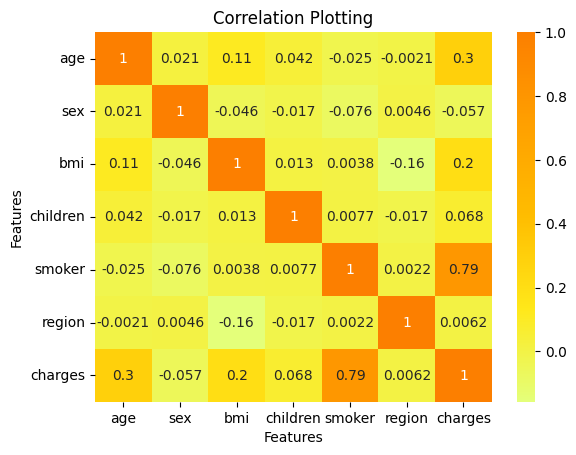

In [4]:
corr = df.corr()
sns.heatmap(corr, cmap='Wistia', annot=True)

plt.title('Correlation Plotting')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Showing how each features contributes in the target by a certain weight so, smoker, age and bmi show the greatest contribution in the target (charges)
smoker contributes by 79% in the charges, age contributes by 30% in the charges, and bmi contributes by about 20% in the charges and the others showed very low contribution that they could be ignored.

In [5]:
x = df[['age', 'bmi', 'smoker']]
y = df['charges']

print(x)
print(y)

      age     bmi  smoker
0      19  27.900       1
1      18  33.770       0
2      28  33.000       0
3      33  22.705       0
4      32  28.880       0
...   ...     ...     ...
1333   50  30.970       0
1334   18  31.920       0
1335   18  36.850       0
1336   21  25.800       0
1337   61  29.070       1

[1338 rows x 3 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [6]:
# Converting data to np arrays
x = np.array(x)
y = np.array(y)

In [7]:
# Add a column of ones to the array (x) for the bias term
x = np.column_stack((np.ones(len(x)), x))

In [8]:
# Spliting the data into training and test sets manually
train_size = int(0.8 * len(x))
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

The linear_regression function estimate the weights for a linear model given the independent variables x (features vector) and the dependent variable y.
x: matrix representing features used to predict the target variable.
y: representing the target that needs to be predicted.

the function Returns weights representing the estimated weights for the regression model which determines the relationship between the features vector and the target value.

In [9]:
# linear regression function
def linear_regression(x, y):
    weights = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return weights


In [10]:
# Train the linear regression model
weights = linear_regression(x_train, y_train)


In [11]:
# Predict on the test data
y_predict = x_test.dot(weights)

# Calculating the R-squared value manually

The code calculates R-squared to assess the goodness-of-fit of a linear regression model and the proportion of the total variation in y_test that is explained by the linear regression model.
first, it computes the mean of the observed values y_test and assigns it to y_mean. Then, it calculates the total sum of squares (SS_total) by summing the squared differences between each observed value and y_mean. 

after that, it computes the residual sum of squares (SS_residual) by summing the squared differences between each observed value and the corresponding predicted value y_predict. Using these values, it calculates the R-squared value as 1 minus the ratio of SS_residual to SS_total.

the higher the r-squared the better the linear regression model.

In [12]:
y_mean = np.mean(y_test)
ss_total = np.sum((y_test - y_mean) ** 2)
ss_residual = np.sum((y_test - y_predict) ** 2)
r2 = 1 - (ss_residual / ss_total)
print(r2)


0.7563721013596153


# Data visualization

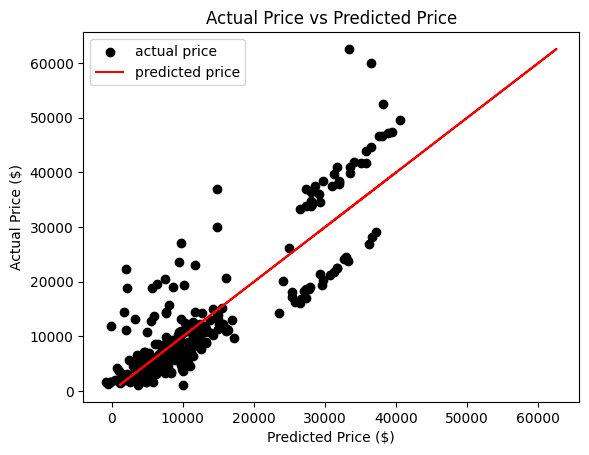

In [13]:
plt.scatter(y_predict, y_test, c='black', label='actual price')
plt.plot(y_test, y_test, c='red', label='predicted price')

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Actual Price ($)')

plt.legend()
plt.show()

the results from the following model varies from that of the model created using sklearn.
as we see the value of the r-squared is 0.7563721013596153 which means about 75.63% accuracy while the value of the r-squared value from the other model is 0.7945500805653087 which is about 79.455% accuracy more than the implemtation from scratch.